In [1]:
#%pip install strawberryfields --upgrade
import matplotlib.pyplot as plt
import bsnsmpl
import vnnmnna

In [2]:
modes, modes_Name, modes_Probs = bsnsmpl.bsp()

S1, S2, code, final_String, res = vnnmnna.VonNuemann(modes)

pre_Final_String, probabilities = vnnmnna.prepareData(res)

QRN = vnnmnna.finalInt(pre_Final_String)

QRNb = ''
for b in range(len(QRN)):
    QRNb = QRNb + str(QRN[b])


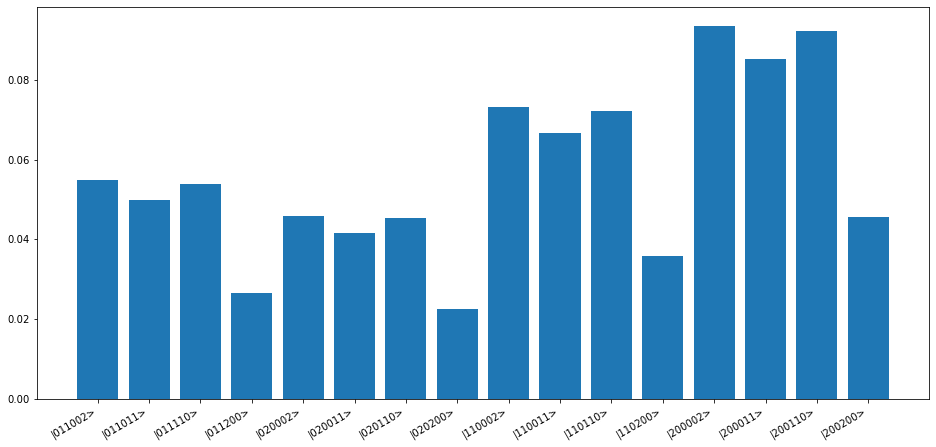

In [3]:
fig1 = plt.figure(figsize=(16, 8))
plt.bar(modes_Name, modes_Probs)
fig1.autofmt_xdate()
plt.show()

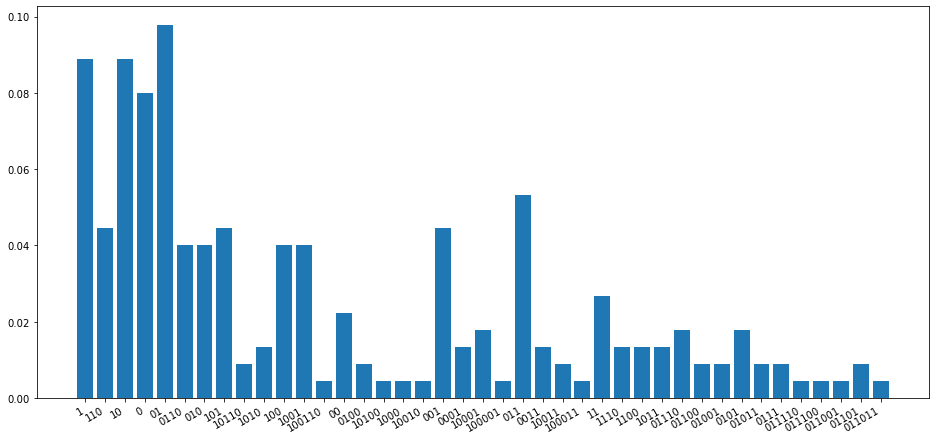

In [4]:
fig2 = plt.figure(figsize=(16, 8))
plt.bar(range(len(res)), probabilities, tick_label=pre_Final_String)
fig2.autofmt_xdate()
plt.show()

In [5]:
input_Data = open('prpare_Data.txt', 'w')

input_Data.write('S1:\n')
for s1 in range(len(S1)):
    input_Data.write('[' + str(S1[s1]) + ']')
input_Data.write('\n\n')

input_Data.write('S2:\n')
for s2 in range(len(S2)):
    input_Data.write('[' + str(S2[s2]) + ']')
input_Data.write('\n\n')

input_Data.write('coding:\n')
for c in range(len(code)):
    input_Data.write(str(code[c]))
input_Data.write('\n\n')

input_Data.write('Final Strings:\n')
for fs in range(len(final_String)):
    input_Data.write('[' + str(final_String[fs]) + ']')

input_Data.close()
#######################################
output_File = open('QRNb.txt', 'w')

output_File.write(QRNb)

output_File.close()
#######################################
print('S1:\n', S1)
print('\n')
print('S2:\n', S2)
print('\n')
print('coding:\n', code)
print('\n')
print('Final String:\n', final_String)
print('\n')
print('count of every Strings:\n', res)
print('\n')
print('Our Quantum Random Number:\n', QRNb)
print('\n')
print('len:\n', len(QRNb))


S1:
 ['011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011002', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011011', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011110', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '011200', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020002', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020011', '020110', '020110', '020110', '020110', '020110', '020110', '020110', '020110', '020110', '020

In [6]:
# sp_800_approximate_entropy_test.py
#
# Copyright (C) 2017 David Johnston
# This program is distributed under the terms of the GNU General Public License.
#
# This file is part of sp800_22_tests.
#
# sp800_22_tests is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# sp800_22_tests is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with sp800_22_tests.  If not, see <http://www.gnu.org/licenses/>.
from __future__ import print_function

import math
from scipy.special import gamma, gammainc, gammaincc
#from gamma_functions import *

def bits_to_int(bits):
    theint = 0
    for i in range(len(bits)):
        theint = (theint << 1) + bits[i]
    return theint
        
def approximate_entropy_test(bits):
    n = len(bits)
    
    m = int(math.floor(math.log(n,2)))-6
    if m < 2:
        m = 2
    if m >3 :
        m = 3
        
    print("  n         = ",n)
    print("  m         = ",m)
    
    Cmi = list()
    phi_m = list()
    for iterm in range(m,m+2):
        # Step 1 
        padded_bits=bits+bits[0:iterm-1]
    
        # Step 2
        counts = list()
        for i in range(2**iterm):
            #print "  Pattern #%d of %d" % (i+1,2**iterm)
            count = 0
            for j in range(n):
                if bits_to_int(padded_bits[j:j+iterm]) == i:
                    count += 1
            counts.append(count)
            print("  Pattern %d of %d, count = %d" % (i+1,2**iterm, count))
    
        # step 3
        Ci = list()
        for i in range(2**iterm):
            Ci.append(float(counts[i])/float(n))
        
        Cmi.append(Ci)
    
        # Step 4
        sum = 0.0
        for i in range(2**iterm):
            if (Ci[i] > 0.0):
                sum += Ci[i]*math.log((Ci[i]/10.0))
        phi_m.append(sum)
        print("  phi(%d)    = %f" % (m,sum))
        
    # Step 5 - let the loop steps 1-4 complete
    
    # Step 6
    appen_m = phi_m[0] - phi_m[1]
    print("  AppEn(%d)  = %f" % (m,appen_m))
    chisq = 2*n*(math.log(2) - appen_m)
    print("  ChiSquare = ",chisq)
    # Step 7
    p = gammaincc(2**(m-1),(chisq/2.0))
    
    success = (p >= 0.01)
    return (success, p, None)

if __name__ == "__main__":
    bits = QRN
    success, p, _ = approximate_entropy_test(bits)
    
    print("success =",success)
    print("p = ",p)


  n         =  168
  m         =  2
  Pattern 1 of 4, count = 36
  Pattern 2 of 4, count = 47
  Pattern 3 of 4, count = 47
  Pattern 4 of 4, count = 38
  phi(2)    = -3.681616
  Pattern 1 of 8, count = 12
  Pattern 2 of 8, count = 24
  Pattern 3 of 8, count = 24
  Pattern 4 of 8, count = 23
  Pattern 5 of 8, count = 24
  Pattern 6 of 8, count = 23
  Pattern 7 of 8, count = 23
  Pattern 8 of 8, count = 15
  phi(2)    = -4.357450
  AppEn(2)  = 0.675835
  ChiSquare =  5.817010834910425
success = True
p =  0.21323714778903138
